 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [54]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [8]:
# Reading whale returns
whale_csv_path = Path("Resources/whale_returns.csv")

whale_returns_df = pd.read_csv(whale_csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

whale_returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [9]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [10]:
# Drop nulls
whale_returns_df.dropna(inplace=True)

whale_returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [11]:
# Reading algorithmic returns
algo_csv_path = Path("Resources/algo_returns.csv")

algo_returns_df = pd.read_csv(algo_csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

algo_returns_df

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [12]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [13]:
# Drop nulls
algo_returns_df.dropna(inplace=True)

algo_returns_df



,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [14]:
# Reading S&P 500 Closing Prices
sp500_csv_path = Path("Resources/sp500_history.csv")

sp500_history_df = pd.read_csv(sp500_csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

sp500_history_df

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06
...,...
2012-10-05,$1460.93
2012-10-04,$1461.40
2012-10-03,$1450.99


In [15]:
# Check Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [16]:
# Fix Data Types
sp500_history_df["Close"] = sp500_history_df["Close"].str.replace('$', '')

sp500_history_df["Close"] = sp500_history_df["Close"].astype("float")

sp500_history_df

/Users/hakobkeymetlyan/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06
...,...
2012-10-05,1460.93
2012-10-04,1461.40
2012-10-03,1450.99


In [17]:
# Calculate Daily Returns
sp500_returns_df = sp500_history_df.pct_change()

sp500_returns_df

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [18]:
# Drop nulls
sp500_returns_df.dropna(inplace=True)

sp500_returns_df

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [19]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns_df.columns = ["SP500"]

sp500_returns_df

,SP500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


## Combine Whale, Algorithmic, and S&P 500 Returns

In [20]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_returns_df, algo_returns_df, sp500_returns_df], axis="columns", join="inner")

combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

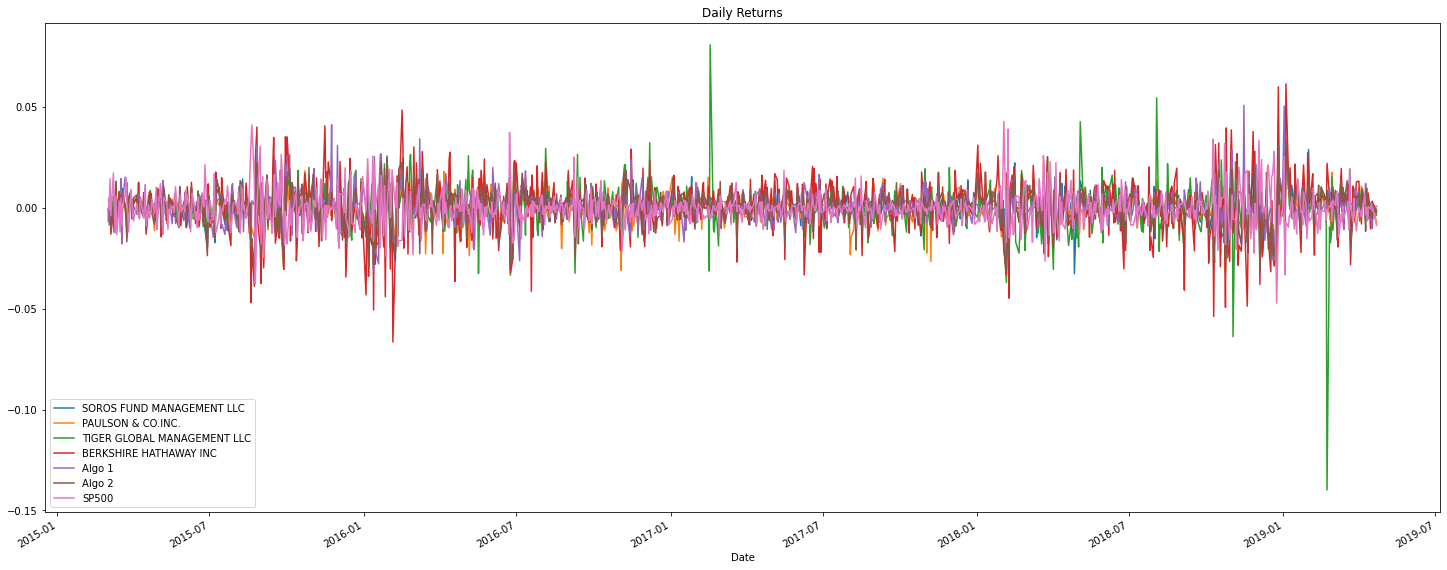

In [27]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(25,10), title="Daily Returns")


#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

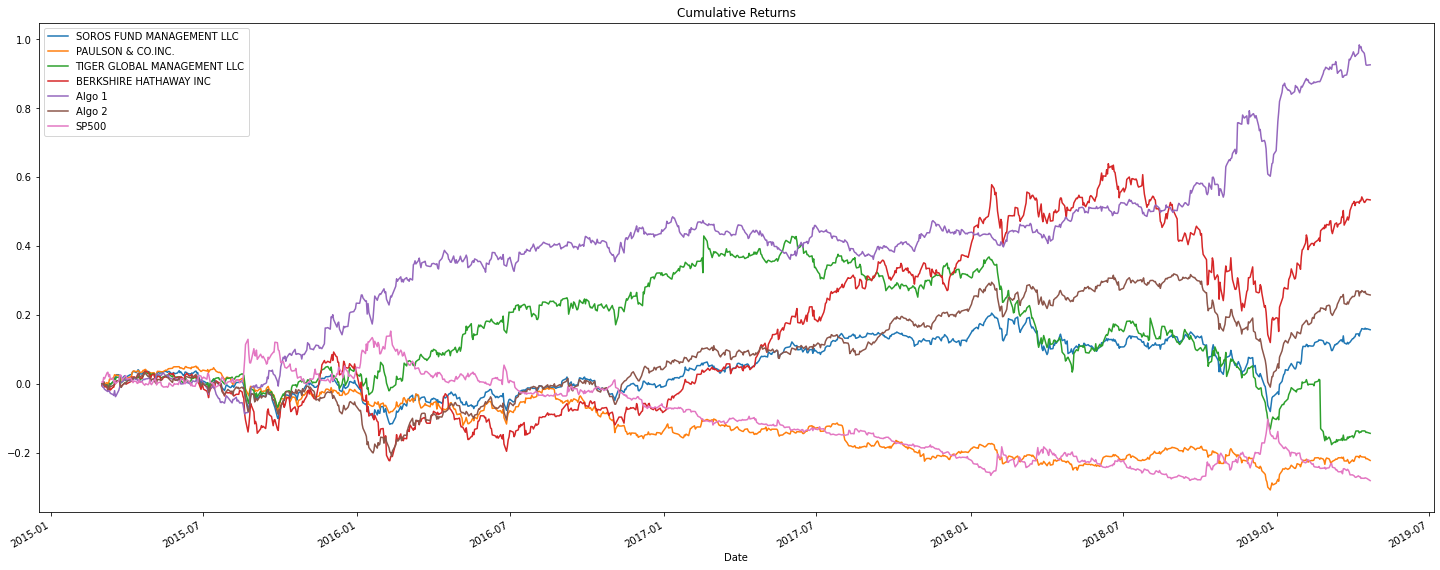

In [28]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod() - 1

# Plot cumulative returns
cumulative_returns.plot(figsize=(25,10), title="Cumulative Returns")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Whale Portfolio Risk'}>

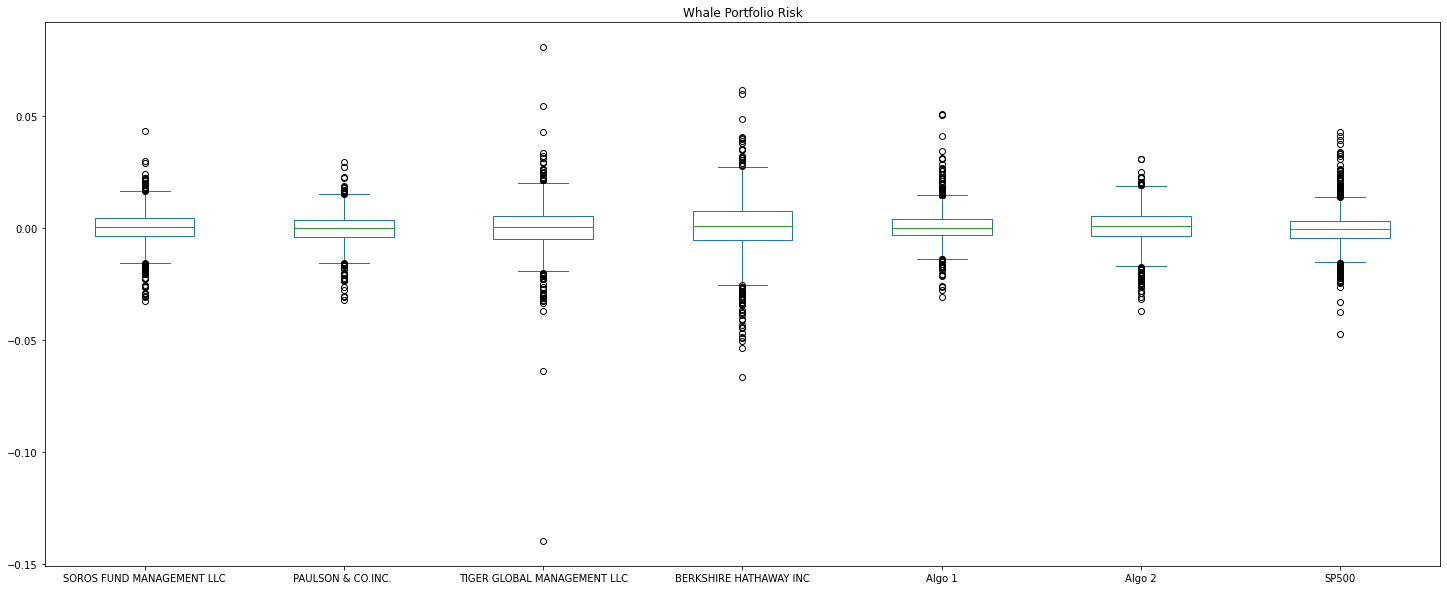

In [37]:
# Box plot to visually show risk
combined_df.plot(kind="box", figsize=(25,10), title="Whale Portfolio Risk")

### Calculate Standard Deviations

In [38]:
# Calculate the daily standard deviations of all portfolios
combined_std = combined_df.std()
combined_std

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
SP500                          0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [40]:
# Calculate  the daily standard deviation of S&P 500
"Calcaulated above"

# Determine which portfolios are riskier than the S&P 500
combined_std = combined_std.sort_values(ascending=False)

combined_std



BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010897
SP500                          0.008587
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007896
Algo 1                         0.007623
PAULSON & CO.INC.              0.007026
dtype: float64

In [43]:
print("TIGER GLOBAL MANAGEMENT LLC and BERKSHIRE HATHAWAY INC are riskier than S&P 500")

TIGER GLOBAL MANAGEMENT LLC and BERKSHIRE HATHAWAY INC are riskier than S&P 500


### Calculate the Annualized Standard Deviation

In [44]:
# Calculate the annualized standard deviation (252 trading days)
combined_annualized_std = combined_std * np.sqrt(252)
combined_annualized_std

BERKSHIRE HATHAWAY INC         0.205079
TIGER GLOBAL MANAGEMENT LLC    0.172989
SP500                          0.136313
Algo 2                         0.132413
SOROS FUND MANAGEMENT LLC      0.125348
Algo 1                         0.121006
PAULSON & CO.INC.              0.111527
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

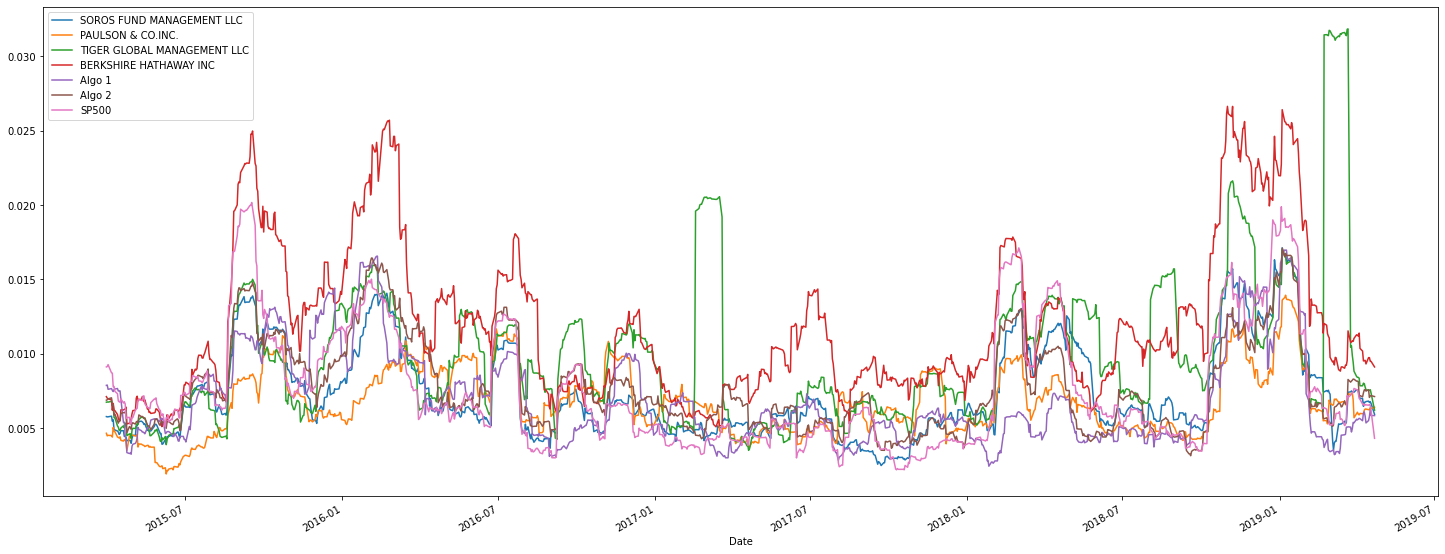

In [51]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_rolling_std = combined_df.rolling(window=21).std()

# Plot the rolling standard deviation
combined_rolling_std.plot(figsize=(25,10))

### Calculate and plot the correlation

<AxesSubplot:>

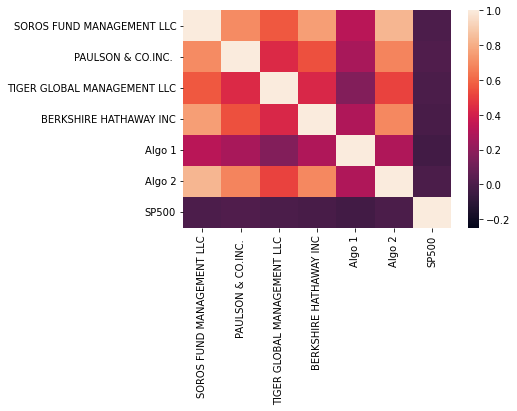

In [64]:
# Calculate the correlation
combined_corr = combined_df.corr()


# Display de correlation matrix
sns.heatmap(combined_corr, vmin=-0.25, vmax=1,)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:xlabel='Date'>

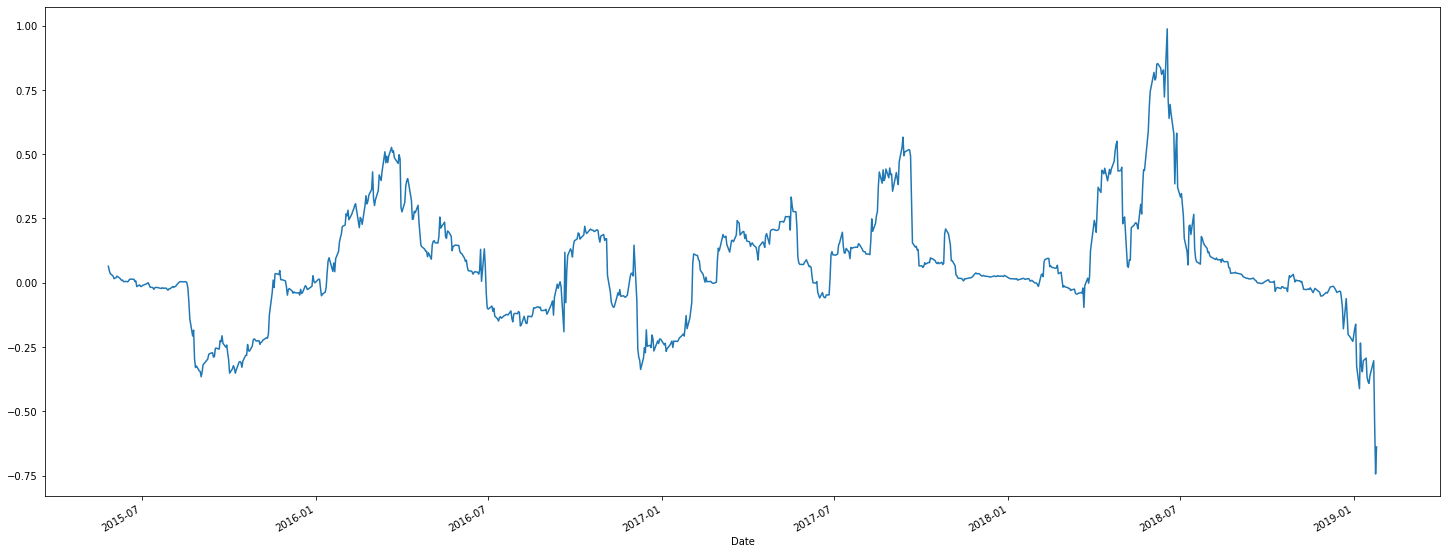

In [65]:
# Calculate covariance of a single portfolio
soros_covariance = combined_df["SOROS FUND MANAGEMENT LLC"].rolling(window=60).cov(sp500_returns_df["SP500"])
soros_covariance

# Calculate variance of S&P 500
SP500_variance = sp500_returns_df["SP500"].rolling(window=60).var()
SP500_variance

# Computing beta
soros_beta = soros_covariance/SP500_variance
soros_beta

# Plot beta trend
soros_beta.plot(figsize=(25,10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:xlabel='Date'>

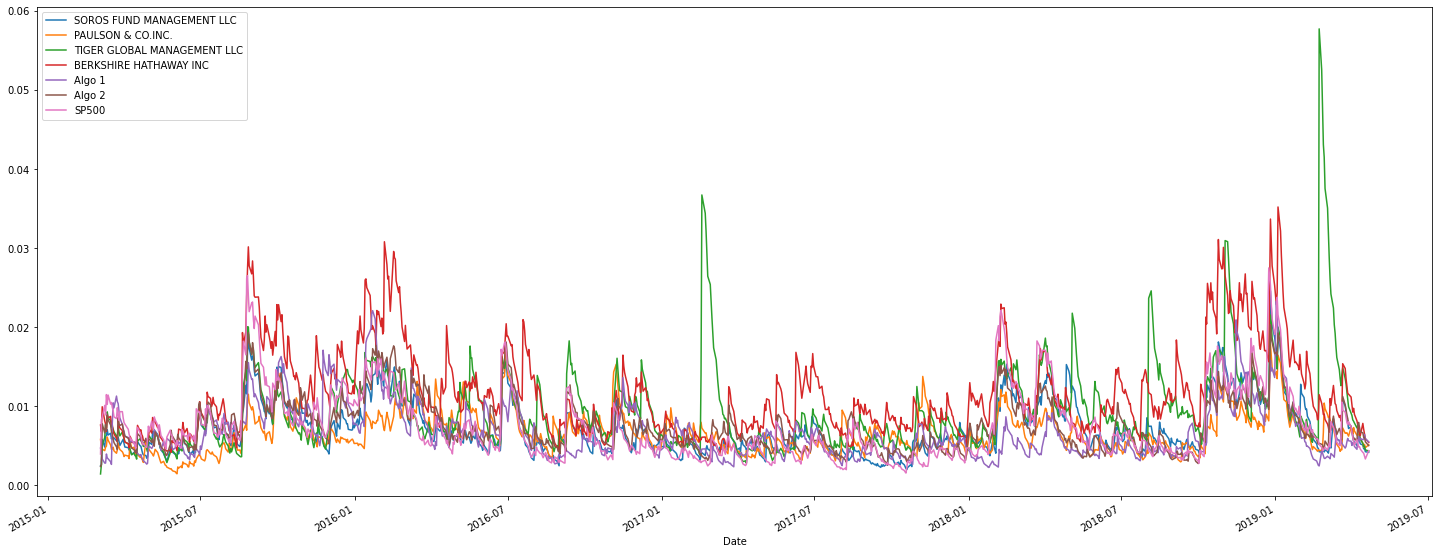

In [68]:
# Use `ewm` to calculate the rolling window
ewm_method = combined_df.ewm(span=10, adjust=True).std().plot(figsize=(25,10))

ewm_method

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [70]:
# Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [71]:
# Reading data from 1st stock
goog_path = Path("Resources/goog_historical.csv")

goog_df = pd.read_csv(goog_path, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)

goog_df = goog_df.drop(columns=["Symbol"])

goog_df.columns = ["GOOG"]

goog_df

,GOOG
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40
...,...
2018-05-17,1078.59
2018-05-16,1081.77
2018-05-15,1079.23


In [72]:
# Reading data from 2nd stock
aapl_path = Path("Resources/aapl_historical.csv")

aapl_df = pd.read_csv(aapl_path, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)

aapl_df = aapl_df.drop(columns=["Symbol"])

aapl_df.columns = ["AAPL"]

aapl_df

,AAPL
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75
...,...
2018-05-17,186.99
2018-05-16,188.18
2018-05-15,186.44


In [73]:
# Reading data from 3rd stock
fb_path = Path("Resources/fb_historical.csv")

fb_df = pd.read_csv(fb_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

fb_df = fb_df.drop(columns=["Volume", "Open", "High", "Low"])

fb_df = fb_df.loc["2018-05-10":"2019-05-09"]

fb_df.columns = ["FB"]

fb_df["FB"] = fb_df["FB"].str.replace('$', '')

fb_df["FB"] = fb_df["FB"].astype("float")

fb_df

/Users/hakobkeymetlyan/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  if sys.path[0] == '':


,FB
Date,
2019-05-09,188.65
2019-05-08,189.54
2019-05-07,189.77
2019-05-06,193.88
2019-05-03,195.47
...,...
2018-05-17,183.76
2018-05-16,183.20
2018-05-15,184.32


In [74]:
# Combine all stocks in a single DataFrame
combined_personal_df = pd.concat([aapl_df, goog_df, fb_df], axis="columns", join="inner")
combined_personal_df.dropna()
combined_personal_df

,AAPL,GOOG,FB
2019-05-09,200.72,1162.38,188.65
2019-05-08,202.90,1166.27,189.54
2019-05-07,202.86,1174.10,189.77
2019-05-06,208.48,1189.39,193.88
2019-05-03,211.75,1185.40,195.47
...,...,...,...
2018-05-17,186.99,1078.59,183.76
2018-05-16,188.18,1081.77,183.20
2018-05-15,186.44,1079.23,184.32
2018-05-14,188.15,1100.20,186.64


In [75]:
# Reset Date index
combined_personal_df.index.name = "Date"

combined_personal_df

,AAPL,GOOG,FB
Date,,,
2019-05-09,200.72,1162.38,188.65
2019-05-08,202.90,1166.27,189.54
2019-05-07,202.86,1174.10,189.77
2019-05-06,208.48,1189.39,193.88
2019-05-03,211.75,1185.40,195.47
...,...,...,...
2018-05-17,186.99,1078.59,183.76
2018-05-16,188.18,1081.77,183.20
2018-05-15,186.44,1079.23,184.32


In [76]:
# Reorganize portfolio data by having a column per symbol
"already organized"

'already organized'

In [78]:
# Calculate daily returns
personal_returns = combined_personal_df.pct_change()

# Drop NAs
personal_returns.dropna(inplace=True)

# Display sample data
personal_returns

,AAPL,GOOG,FB
Date,,,
2019-05-08,0.010861,0.003347,0.004718
2019-05-07,-0.000197,0.006714,0.001213
2019-05-06,0.027704,0.013023,0.021658
2019-05-03,0.015685,-0.003355,0.008201
2019-05-02,-0.012279,-0.019226,-0.015041
...,...,...,...
2018-05-17,0.003650,0.011469,0.005912
2018-05-16,0.006364,0.002948,-0.003047
2018-05-15,-0.009246,-0.002348,0.006114


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [79]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
personal_weighted = personal_returns.dot(weights)

# Display sample data
personal_weighted

Date
2019-05-08    0.006308
2019-05-07    0.002577
2019-05-06    0.020795
2019-05-03    0.006844
2019-05-02   -0.015515
                ...   
2018-05-17    0.007010
2018-05-16    0.002088
2018-05-15   -0.001827
2018-05-14    0.013730
2018-05-11    0.000817
Length: 249, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [80]:
# Join your returns DataFrame to the original returns DataFrame
final_combined_df = pd.concat([combined_df, personal_weighted], axis="columns", join="inner")

final_combined_df.columns = ["SOROS FUND MANAGEMENT LLC", "PAULSON & CO.INC.", "TIGER GLOBAL MANAGEMENT LLC", "BERKSHIRE HATHAWAY INC", "Algo 1", "Algo 2", "SP500", "Personal Portfolio"]

final_combined_df


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,Personal Portfolio
Date,,,,,,,,
2018-05-11,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,-0.000883,0.000817
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,0.013730
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,-0.001827
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,0.002088
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,0.007010
...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,-0.000218
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,-0.008682
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,-0.000267


In [81]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
final_combined_df.dropna(inplace=True)

final_combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,Personal Portfolio
Date,,,,,,,,
2018-05-11,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,-0.000883,0.000817
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,0.013730
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,-0.001827
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,0.002088
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,0.007010
...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,-0.000218
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,-0.008682
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,-0.000267


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [86]:
# Calculate the annualized `std`
final_annualizad_std = final_combined_df.std()* np.sqrt(252)
final_annualizad_std.sort_values(ascending=False, inplace=True)
final_annualizad_std

Personal Portfolio             0.264814
BERKSHIRE HATHAWAY INC         0.246819
TIGER GLOBAL MANAGEMENT LLC    0.232434
SP500                          0.152147
SOROS FUND MANAGEMENT LLC      0.146589
Algo 2                         0.139204
Algo 1                         0.133645
PAULSON & CO.INC.              0.116683
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

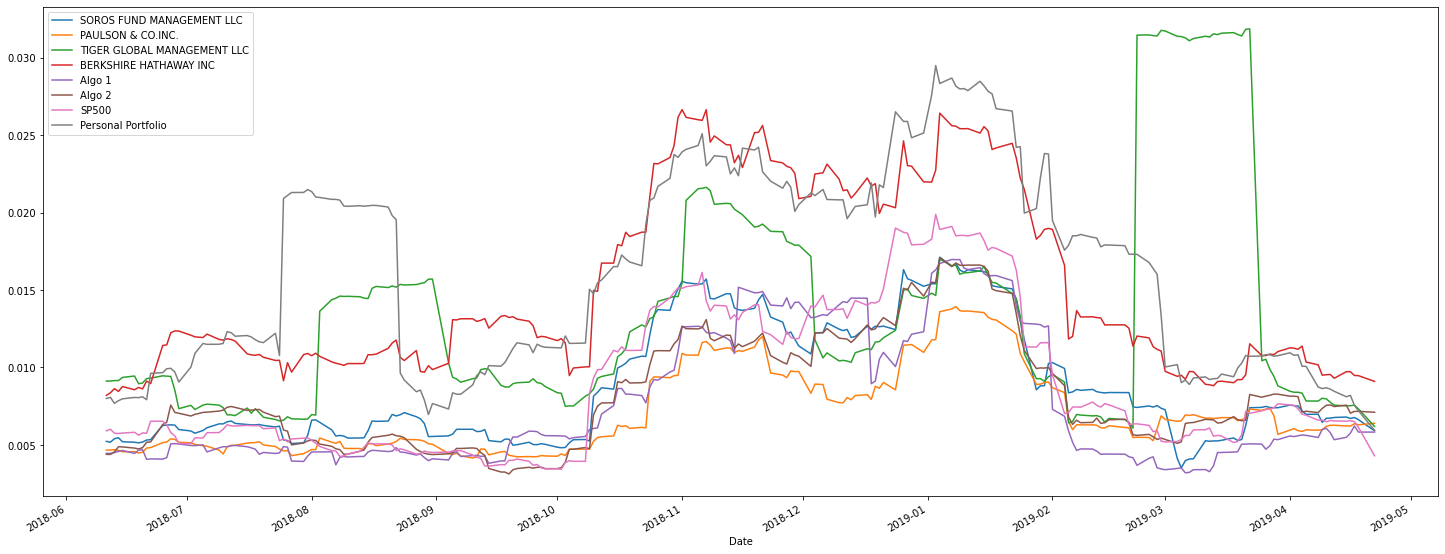

In [87]:
# Calculate rolling standard deviation
rolling_final_std = final_combined_df.rolling(window=21).std()

# Plot rolling standard deviation
rolling_final_std.plot(figsize=(25,10))

### Calculate and plot the correlation

<AxesSubplot:>

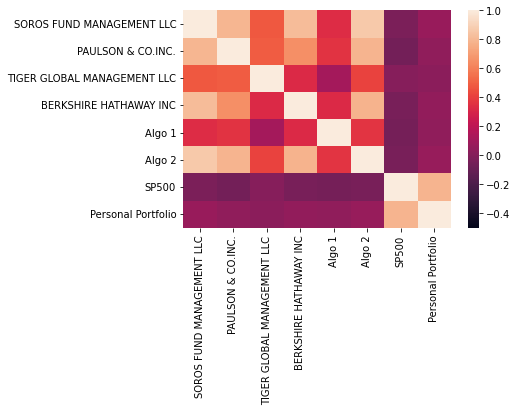

In [92]:
# Calculate and plot the correlation
personal_corr = final_combined_df.corr()

sns.heatmap(personal_corr, vmin=-0.5, vmax=1,)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:xlabel='Date'>

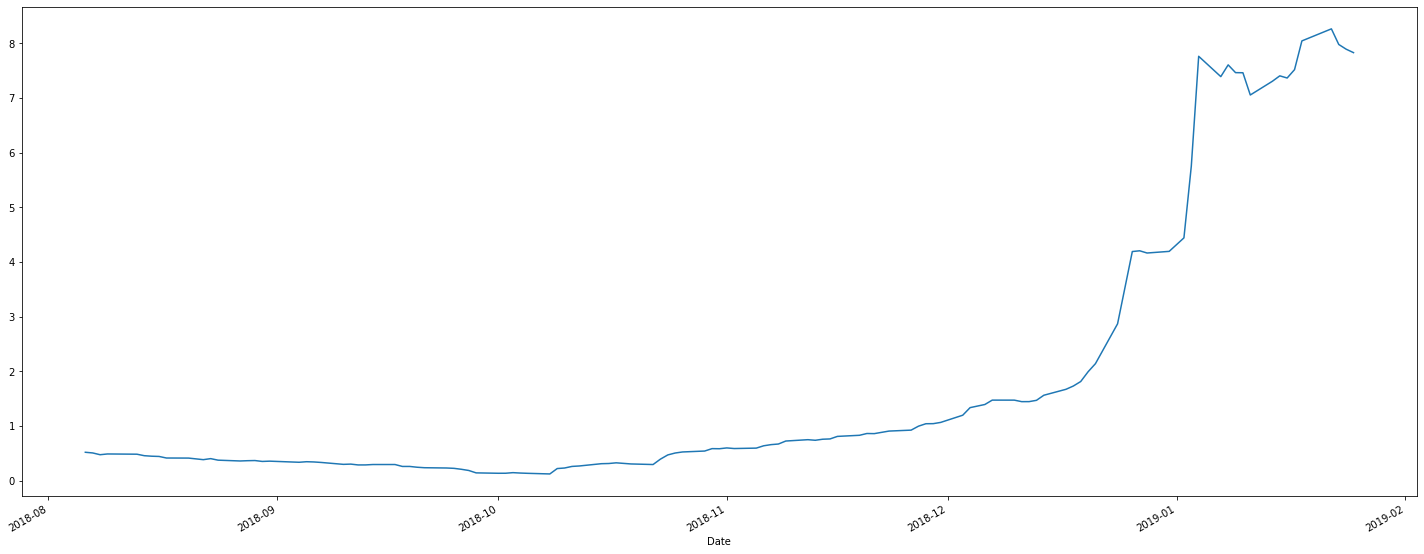

In [93]:
# Calculate and plot Beta
personal_covariance = final_combined_df["Personal Portfolio"].rolling(window=60).cov(sp500_returns_df["SP500"])
personal_covariance


SP500_variance = sp500_returns_df["SP500"].rolling(window=60).var()
SP500_variance


personal_beta = personal_covariance/SP500_variance
personal_beta


personal_beta.plot(figsize=(25,10))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

My portfolio had the highest annualized standard deviation, and one of the higher rolling standard deviations, which talks about its extreme volatility compared to other portfolios. Adiotionally, my portfolio had almost no correlation with any of the other portfolios, but had a decently strong positive correlation with the s&p500, which I think is a result of me choosing the biggest players in the market, which have a pretty big influence on how the market moves. Overall, I think my portfolio is a bit on the riskier side, especially during the recent years the beta has been exponentially increasing, so I would be casutious investing in it.